In [1]:
import sys
sys.path.insert(0,'..')

from src.definitions import *
from src.plotting import *
from src.processing import *
from src.stats import *
from src.figures import *
from tqdm.notebook import tqdm


once_df = load_once_complete()
weekly_df = load_weekly()
biweekly_df = load_biweekly()
monthly_df = load_monthly()

sleep_df = load_sleep()
garmin_df = load_garmin_subset()
merged_df = load_merge_all_nogarmin()

daily = ["daily_stress_measure.csv.gz", "cough_ema.csv.gz", "selfassessment_mannequin_sam.csv.gz",
        "ppe_and_exposure_scale.csv.gz"]

weekly = ["perceived_stress_scale_pss4.csv.gz", "promis_sleep_disturbance_sd.csv.gz",
         "promis_sleeprelated_impairment_sri.csv.gz", "ongoing_covid19_risk.csv.gz",
         "fatigue_severity_scale_fss9.csv.gz", "cough_vas.csv.gz"]

monthly = ["promis_global10.csv.gz", "promis_emotional_support.csv.gz", "rand_36item_short_form_health_survey.csv.gz",
          "survey_response_inclination_sri.csv.gz"]

other_week = ["patient_health_questionnaire_phq9.csv.gz", "generalized_anxiety_disorder_scale_gad7.csv.gz"]

oura = ['breath_average','efficiency','hr_average','hr_lowest','onset_latency','score','temperature_delta','temperature_trend_deviation','total','log_hrv']
garmin = ['steps','minHeartRateInBeatsPerMinute','maxHeartRateInBeatsPerMinute','averageHeartRateInBeatsPerMinute','restingHeartRateInBeatsPerMinute','averageStressLevel','maxStressLevel','stressDurationInSeconds','restStressDurationInSeconds','activityStressDurationInSeconds','lowStressDurationInSeconds','mediumStressDurationInSeconds','highStressDurationInSeconds']
surveys = ['daily_stressed','daily_control','daily_shifts','sam8','shift_stress','promis_sd5','EBTBP','phq9_score','gad7_score','promis_sri_score','pss4_score','promis_es_score',"fss_score"]
population = ["p_id", "dem_age", "dem_gender", "height", "weight", "ace_score", "hx_any", "mhx_any", "ptsd_score", "life_events_score"]

../src/processing.py:83: FutureWarning: Passing 'suffixes' which cause duplicate columns {'redcap_repeat_instance_y_x', 'redcap_repeat_instance_x_x', 'redcap_repeat_instrument_x_x', 'redcap_repeat_instrument_y_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = reduce(lambda left,right: pd.merge(left,right,how='left',on=["participant_id","date"]), dfs)
../src/processing.py:83: FutureWarning: Passing 'suffixes' which cause duplicate columns {'record_id_x_x', 'record_id_y_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = reduce(lambda left,right: pd.merge(left,right,how='left',on=["participant_id","date"]), dfs)
../src/processing.py:173: FutureWarning: Passing 'suffixes' which cause duplicate columns {'redcap_repeat_instance_y_x', 'redcap_repeat_instance_x_x', 'redcap_repeat_instrument_x_x', 'redcap_repeat_instrument_y_x'} in the result is deprecated and will raise a MergeError in a future version.
  df

# Completeness of Oura and Garmin Data

In [2]:
#Number of People Oura
#N Unique = sleep_df.participant_id.nunique() = 354
print("Oura Sleep Data: ")
df_unique_duration(sleep_df, 50)

#Number of People Garmin

#N Unique = garmin_df.participant_id.nunique() = 95
print("\nGarmin Data: ")
df_unique_duration(garmin_df, 50)

#Number of People Oura + Surveys
#merged_df = load_merge_all_nogarmin()
#N Unique = garmin_df.participant_id.nunique() = 383

#Of Oura + Surveys, number of observed days +/- std

Oura Sleep Data: 
	Number of participants w/ at least 50 days: 278
	Avg number of observed days:  76.409604519774
	Std of observed days:  32.393049027026215
	Avg number of total days (filled):  92.58474576271186
	Std of total days (filled):  31.76297980278791
	Avg Fraction of days complete:  0.8100338666282204
	Std Fraction of days complete:  0.1740506489059785

Garmin Data: 
	Number of participants w/ at least 50 days: 0
	Avg number of observed days:  25.0
	Std of observed days:  5.941823218330779
	Avg number of total days (filled):  27.03157894736842
	Std of total days (filled):  4.203889506232225
	Avg Fraction of days complete:  0.9173173587188634
	Std Fraction of days complete:  0.14893211036962234


# Survey Data Completeness

In [3]:
#Missingno plots for a few individuals
#Expected vs Actual frequencies of surveys

#Daily Surveys
daily_df = load_daily()
print("\nDaily Survey Data: ")
df_unique_duration(daily_df, 10)

print("\nOnce Survey Data: ")
survey_completeness_once()
print("\nDaily Survey Data: ")
survey_completeness(daily, "D")
print("\nWeekly Survey Data: ")
survey_completeness(weekly, "W")
print("\nBiweekly Survey Data: ")
survey_completeness(other_week, "2W")
print("\nMonthly Survey Data: ")
survey_completeness(monthly, "M")


Daily Survey Data: 
	Number of participants w/ at least 10 days: 346
	Avg number of observed days:  72.45042492917847
	Std of observed days:  32.76387245650836
	Avg number of total days (filled):  100.02266288951841
	Std of total days (filled):  29.882954803865523
	Avg Fraction of days complete:  0.7018333573062083
	Std Fraction of days complete:  0.205352912397597

Once Survey Data: 
participants.csv.gz
	Number of participants completed:  1.0
demographics_survey.csv.gz
	Number of participants completed:  0.9530026109660574
baseline_covid19_risk.csv.gz
	Number of participants completed:  0.9216710182767625
medical_history.csv.gz
	Number of participants completed:  0.9216710182767625
family_factors.csv.gz
	Number of participants completed:  0.9138381201044387
lifestyle_survey.csv.gz
	Number of participants completed:  0.9138381201044387
life_events_checklist_10item.csv.gz
	Number of participants completed:  0.9138381201044387
adverse_childhood_events_ace.csv.gz
	Number of participants 

In [4]:
def missing_viz(df,p, features):
    df1 = fetch_participant_df(df, p)
    df1 = missing_rows(df1)
    
    plt.figure()
    msno.matrix(df1[features])
    plt.show()

<Figure size 432x288 with 0 Axes>

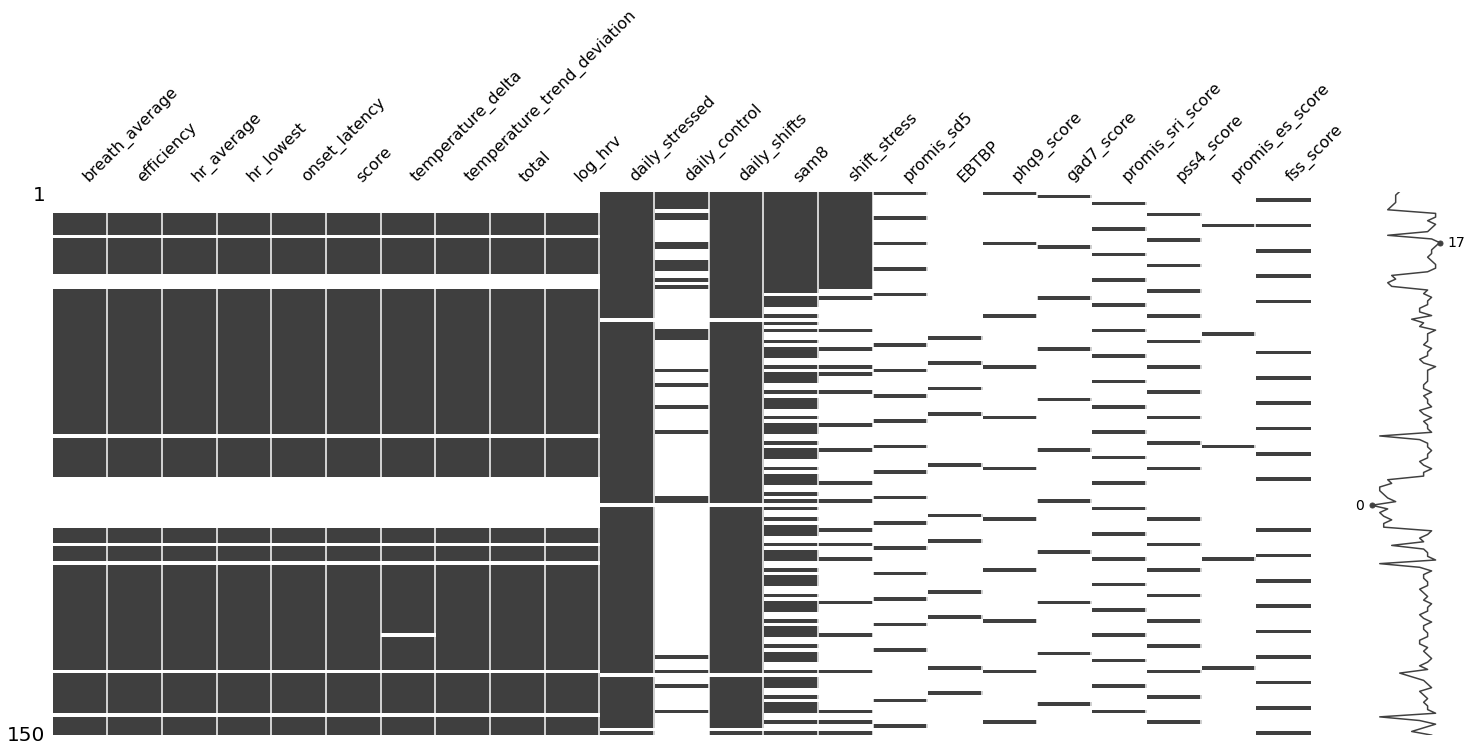

In [5]:
p = rand_participant(merged_df, 1)
missing_viz(merged_df, p, oura+surveys)

# Distributions of Age, Gender, Proportion of mental health, physical health conditions. Distributions of ACE scores, PTSD scores, Life Events score


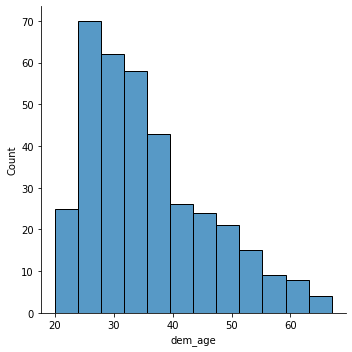

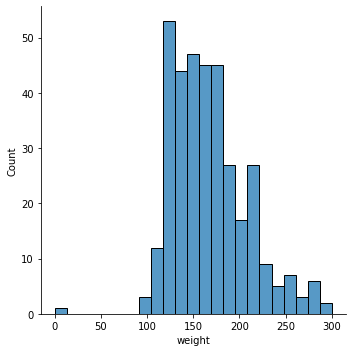

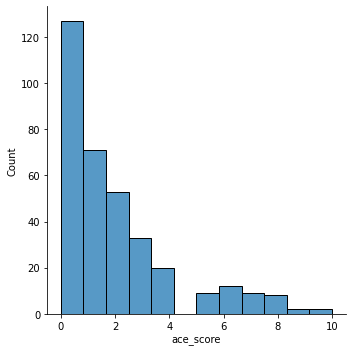

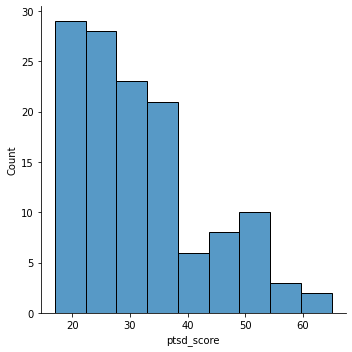

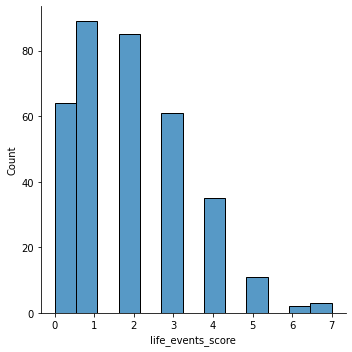

In [6]:
continuous = ["dem_age", "weight", "ace_score", "ptsd_score", "life_events_score"]
categorical = ["dem_gender", 'hx_none', 'hx_diabetes', 'hx_obesity', 'hx_heart',
        'hx_lung', 'hx_rheum', 'hx_kidney', 'hx_liver', 'hx_allergies',
        'hx_pain', 'hx_gi', 'hx_ent', 'hx_neuro', 'hx_other','hx_any',
        'mhx_none', 'mhx_mood', 'mhx_anxiety', 'mhx_psych', 'mhx_eating',
        'mhx_neurodev', 'mhx_sleep', 'mhx_suicide', 'mhx_learning',
        'mhx_other', 'mhx_any','alcohol', 'binge', 'smoke', 'exercise']


for item in continuous:
    sns.displot(data=once_df, x=item, common_norm=False)

In [7]:
for item in categorical:
    print(once_df[item].value_counts(normalize=True) * 100)
    

1.0    89.041096
2.0    10.958904
Name: dem_gender, dtype: float64
0.0    62.03966
1.0    37.96034
Name: hx_none, dtype: float64
0.0    98.866856
1.0     1.133144
Name: hx_diabetes, dtype: float64
0.0    84.985836
1.0    15.014164
Name: hx_obesity, dtype: float64
0.0    94.050992
1.0     5.949008
Name: hx_heart, dtype: float64
0.0    85.835694
1.0    14.164306
Name: hx_lung, dtype: float64
0.0    94.90085
1.0     5.09915
Name: hx_rheum, dtype: float64
0.0    99.433428
1.0     0.566572
Name: hx_kidney, dtype: float64
0.0    99.716714
1.0     0.283286
Name: hx_liver, dtype: float64
0.0    67.988669
1.0    32.011331
Name: hx_allergies, dtype: float64
0.0    83.852691
1.0    16.147309
Name: hx_pain, dtype: float64
0.0    88.385269
1.0    11.614731
Name: hx_gi, dtype: float64
0.0    92.067989
1.0     7.932011
Name: hx_ent, dtype: float64
0.0    98.300283
1.0     1.699717
Name: hx_neuro, dtype: float64
0.0    91.784703
1.0     8.215297
Name: hx_other, dtype: float64
1.0    62.03966
0.0    37

In [8]:
#alcohol ratio
#All participants with sex data
once_df.exercise.value_counts().sum()

350

In [9]:
#MhX ratio
#All participants with sex data
once_df.mhx_any.value_counts()

0.0    208
1.0    145
Name: mhx_any, dtype: int64

In [10]:
#hx_any ratio
#All participants with sex data
once_df.hx_any.value_counts()

1.0    219
0.0    134
Name: hx_any, dtype: int64

In [11]:
#Sex ratio
#All participants with sex data
once_df.dem_gender.value_counts()

1.0    325
2.0     40
Name: dem_gender, dtype: int64

In [12]:
#Race ratio
#All participants with sex data
once_df.dem_race.value_counts()

1.0    302
3.0     27
5.0     21
2.0      8
6.0      5
4.0      2
Name: dem_race, dtype: int64

In [13]:
once_df.ptsd_score.describe()

count    130.000000
mean      31.769231
std       10.967562
min       17.000000
25%       23.000000
50%       29.000000
75%       36.750000
max       65.000000
Name: ptsd_score, dtype: float64

In [14]:
once_df.ace_score.describe()

count    346.000000
mean       1.843931
std        2.216913
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       10.000000
Name: ace_score, dtype: float64

In [15]:
once_df.dem_age.describe()

count    365.000000
mean      35.690411
std       10.312163
min       20.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       67.000000
Name: dem_age, dtype: float64

In [16]:
once_df.weight.describe()

count    353.000000
mean     167.047309
std       40.462858
min        0.000000
25%      140.000000
50%      160.000000
75%      188.000000
max      300.000000
Name: weight, dtype: float64

# Inter and intra individual Frequency of various stress definitions

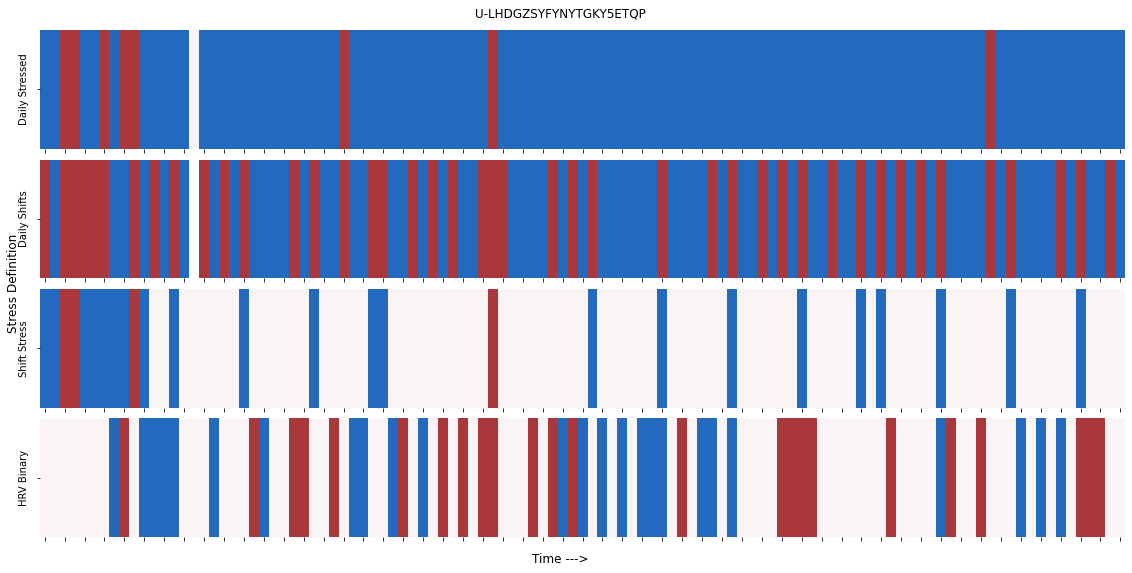

In [17]:
p = rand_participant(merged_df, 1)
plot_stress_frequency(merged_df, p)

In [18]:
from sklearn.metrics import jaccard_score

def jaccard_kde(feature_a, feature_b):
    jaccard_scores = []
    classes = []
    for p in tqdm(merged_df.participant_id.unique()):

        df1 = fetch_participant_df(merged_df, p)
        if len(df1)>1:

            #Add missing rows
            df1 = missing_rows(df1)

            df1 = hrv_binarize(df1, 0.75, 0.25)
            df1 = any_stress(df1)

            df1["daily_shifts_binary"] = df1.apply (lambda row: recode_nan(daily_shifts_binarize(row.daily_shifts)), axis=1)
            df1["daily_stressed"] = df1.apply (lambda row: recode_nan(row.daily_stressed), axis=1)
            df1["daily_shifts"] = df1.apply (lambda row: recode_nan(row.daily_shifts), axis=1)
            df1["shift_stress"] = df1.apply (lambda row: recode_nan(row.shift_stress), axis=1)
            df1["hrv_binary"] = df1.apply (lambda row: recode_nan(row.hrv_binary), axis=1)


            score = jaccard_score(df1[feature_a].values,df1[feature_b].values, average=None)
            if len(score) == 3:
                jaccard_scores.append(score[0])
                classes.append("Non Stress")
                jaccard_scores.append(score[1])
                classes.append("Missing")
                jaccard_scores.append(score[2])
                classes.append("Stress")
            elif len(score) == 2:
                jaccard_scores.append(score[0])
                classes.append("Non Stress")
                jaccard_scores.append(score[1])
                classes.append("Stress")
                jaccard_scores.append(None)
                classes.append("Missing")

    jaccard_df = {"Jaccard Score":jaccard_scores, "Class":classes}

    jaccard_df = pd.DataFrame.from_dict(jaccard_df)
    
    print(feature_a, feature_b)
    print(jaccard_df.groupby('Class')["Jaccard Score"].describe())
    plt.figure()
    sns.kdeplot(x=jaccard_scores, hue=classes, data = jaccard_df,fill=True, common_norm=False, palette=[evi_purple, evi_blue, evi_orange], alpha=.5)
    plt.show()
    return jaccard_df

  0%|          | 0/383 [00:00<?, ?it/s]

daily_stressed daily_shifts_binary
            count      mean       std  min       25%       50%       75%  max
Class                                                                        
Missing     349.0  1.000000  0.000000  1.0  1.000000  1.000000  1.000000  1.0
Non Stress  353.0  0.529421  0.156473  0.0  0.439024  0.538462  0.634146  1.0
Stress      353.0  0.322145  0.200503  0.0  0.166667  0.304348  0.462687  1.0


/h/snagaraj/.local/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


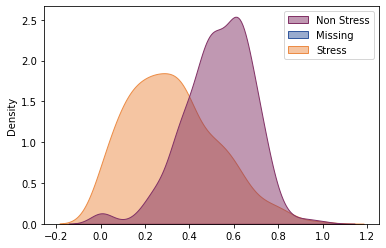

  0%|          | 0/383 [00:00<?, ?it/s]

daily_stressed shift_stress
            count      mean       std  min       25%       50%       75%  max
Class                                                                        
Missing     345.0  0.430020  0.261617  0.0  0.200000  0.396040  0.632653  1.0
Non Stress  353.0  0.301858  0.167076  0.0  0.186047  0.285714  0.400000  1.0
Stress      353.0  0.315646  0.194595  0.0  0.176471  0.307692  0.428571  1.0


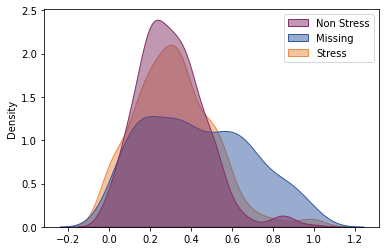

  0%|          | 0/383 [00:00<?, ?it/s]

daily_stressed hrv_binary
            count      mean       std  min       25%       50%       75%  \
Class                                                                      
Missing     364.0  0.292953  0.191921  0.0  0.135207  0.263903  0.419545   
Non Stress  366.0  0.150903  0.080169  0.0  0.098496  0.163722  0.205392   
Stress      366.0  0.084831  0.094780  0.0  0.024107  0.069366  0.126995   

                 max  
Class                 
Missing     0.857143  
Non Stress  0.384615  
Stress      0.989362  


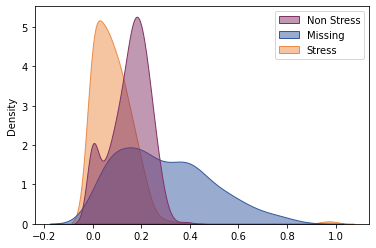

  0%|          | 0/383 [00:00<?, ?it/s]

daily_shifts_binary shift_stress
            count      mean       std  min       25%       50%       75%  max
Class                                                                        
Missing     352.0  0.433177  0.262221  0.0  0.206542  0.406415  0.632653  1.0
Non Stress  353.0  0.129243  0.159428  0.0  0.000000  0.076923  0.207792  1.0
Stress      353.0  0.236396  0.165507  0.0  0.120000  0.206897  0.333333  1.0


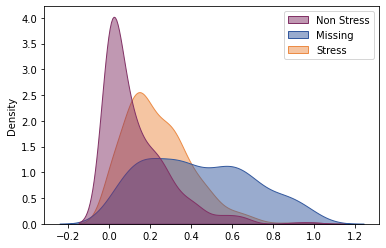

  0%|          | 0/383 [00:00<?, ?it/s]

daily_shifts_binary hrv_binary
            count      mean       std  min       25%       50%       75%  \
Class                                                                      
Missing     364.0  0.292953  0.191921  0.0  0.135207  0.263903  0.419545   
Non Stress  366.0  0.142466  0.087042  0.0  0.081633  0.149627  0.201899   
Stress      366.0  0.121601  0.098018  0.0  0.062832  0.117647  0.166667   

                 max  
Class                 
Missing     0.857143  
Non Stress  0.416667  
Stress      0.989362  


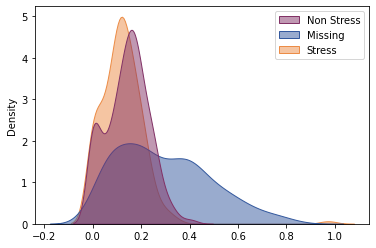

  0%|          | 0/383 [00:00<?, ?it/s]

shift_stress hrv_binary
            count      mean       std       min       25%       50%       75%  \
Class                                                                           
Missing     361.0  0.525314  0.126648  0.054054  0.439252  0.511628  0.593220   
Non Stress  365.0  0.092797  0.087904  0.000000  0.040000  0.083333  0.130435   
Stress      365.0  0.053800  0.089017  0.000000  0.000000  0.033333  0.083333   

                 max  
Class                 
Missing     0.911765  
Non Stress  0.937500  
Stress      0.989362  


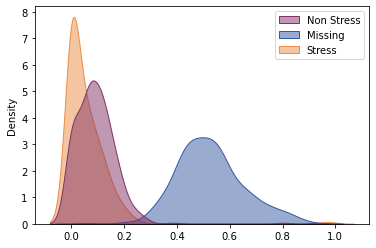

In [19]:
import itertools


recoded = {"daily_stressed": "Daily Stress", "daily_shifts_binary": "Daily Shifts", "shift_stress": "Shift Stress", "hrv_binary": "HRV Binary"}


jaccard_scores = []
pairs = []


my_list = ["daily_stressed","daily_shifts_binary", "shift_stress","hrv_binary"]
for a,b in itertools.combinations(my_list, 2):
    jaccard_df = jaccard_kde(a, b)
    values = jaccard_df[jaccard_df["Class"] == "Stress"]["Jaccard Score"].values
    
    pair_recoded = recoded[a] + " x " + recoded[b]
    for value in values:
        jaccard_scores.append(value)
        pairs.append(pair_recoded)

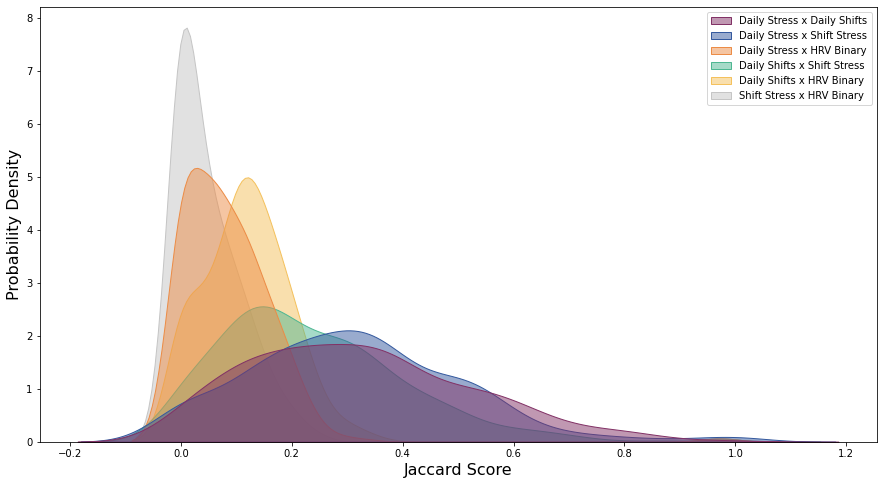

In [20]:
combined_jaccard_df = {"Jaccard Score":jaccard_scores, "Label Pair":pairs}

combined_jaccard_df = pd.DataFrame.from_dict(combined_jaccard_df)

plt.figure(figsize=(15,8))
sns.kdeplot(x=jaccard_scores, hue=pairs, data = combined_jaccard_df,fill=True, common_norm=False, palette=[evi_purple, evi_blue, evi_orange, evi_green, evi_yellow, evi_gray], alpha=.5)
plt.xlabel('Jaccard Score', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.show()

# Sanity Checks

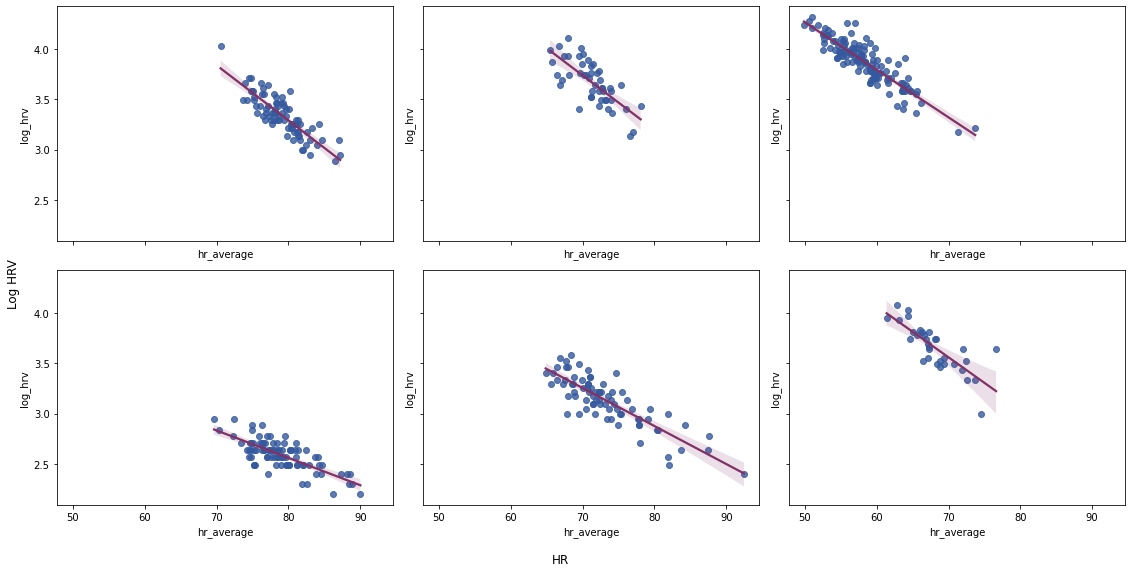

In [21]:
def plot_6_hrxhrv(df):
    
    participants=[]
    dfs = []
    while len(participants)!=6:
        p = rand_participant(df, 1)
        df1 = fetch_participant_df(df, p)
            #Add missing rows
        #df1 = missing_rows(df1)
        if len(df1.hr_average.dropna())>=20 and len(df1.log_hrv.dropna())>=20:
            participants.append(p)
            dfs.append(df1)

    

    fig, ax = plt.subplots(2, 3, sharex=True,sharey=True, figsize=(16,8))


    sns.regplot(x="hr_average", y="log_hrv", data=dfs[0], ax = ax[0,0], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="log_hrv", data=dfs[1], ax = ax[0,1], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="log_hrv", data=dfs[2], ax = ax[0,2], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="log_hrv", data=dfs[3], ax = ax[1,0], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="log_hrv", data=dfs[4], ax = ax[1,1], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="log_hrv", data=dfs[5], ax = ax[1,2], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    
    
    #fig.suptitle(p)
    fig.supylabel("Log HRV")
    fig.supxlabel('HR')
    plt.tight_layout()

#HR x HRV Oura at individual level
plot_6_hrxhrv(merged_df)

In [22]:
def plot_hr_hrv_correlations(df):

    correlations = []
    for p in df.participant_id.unique():
        df1 = fetch_participant_df(merged_df, p)

        if len(df1.hr_average.dropna())>=20 and len(df1.log_hrv.dropna())>=20:
            correlations.append(df1.hr_average.corr(df1.log_hrv))
    ax = sns.distplot(correlations, hist=False)

/h/snagaraj/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


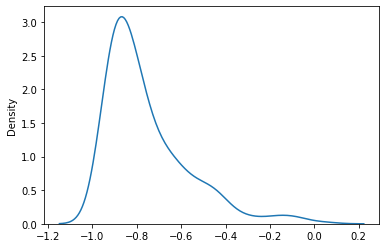

In [23]:
plot_hr_hrv_correlations(merged_df)

In [24]:
def plot_6_daytime_nighttime(df):
    
    participants=[]
    dfs = []
    while len(participants)!=6:
        p = rand_participant(df, 1)
        df1 = fetch_participant_df(df, p)
            #Add missing rows
        #df1 = missing_rows(df1)
        if len(df1.hr_average.dropna())>=10 and len(df1.averageHeartRateInBeatsPerMinute.dropna())>=10:
            participants.append(p)
            dfs.append(df1)

    

    fig, ax = plt.subplots(2, 3, figsize=(16,8), sharex=True,sharey=True)


    sns.regplot(x="hr_average", y="averageHeartRateInBeatsPerMinute", data=dfs[0], ax = ax[0,0], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="averageHeartRateInBeatsPerMinute", data=dfs[1], ax = ax[0,1], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="averageHeartRateInBeatsPerMinute", data=dfs[2], ax = ax[0,2], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="averageHeartRateInBeatsPerMinute", data=dfs[3], ax = ax[1,0], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="averageHeartRateInBeatsPerMinute", data=dfs[4], ax = ax[1,1], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="hr_average", y="averageHeartRateInBeatsPerMinute", data=dfs[5], ax = ax[1,2], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    
    #fig.suptitle(p)
    fig.supylabel("Daytime HR")
    fig.supxlabel('Nighttime HR')
    plt.tight_layout()
    
    fig, ax = plt.subplots(2, 3, figsize=(16,8), sharex=True,sharey=True)


    sns.regplot(x="log_hrv", y="averageStressLevel", data=dfs[0], ax = ax[0,0], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="log_hrv", y="averageStressLevel", data=dfs[1], ax = ax[0,1], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="log_hrv", y="averageStressLevel", data=dfs[2], ax = ax[0,2], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="log_hrv", y="averageStressLevel", data=dfs[3], ax = ax[1,0], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="log_hrv", y="averageStressLevel", data=dfs[4], ax = ax[1,1], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    sns.regplot(x="log_hrv", y="averageStressLevel", data=dfs[5], ax = ax[1,2], scatter_kws={"color": evi_blue}, line_kws={"color": evi_purple}, ci =95)
    
    #fig.suptitle(p)
    fig.supylabel("Daytime HRV")
    fig.supxlabel('Nighttime HRV')
    plt.tight_layout()

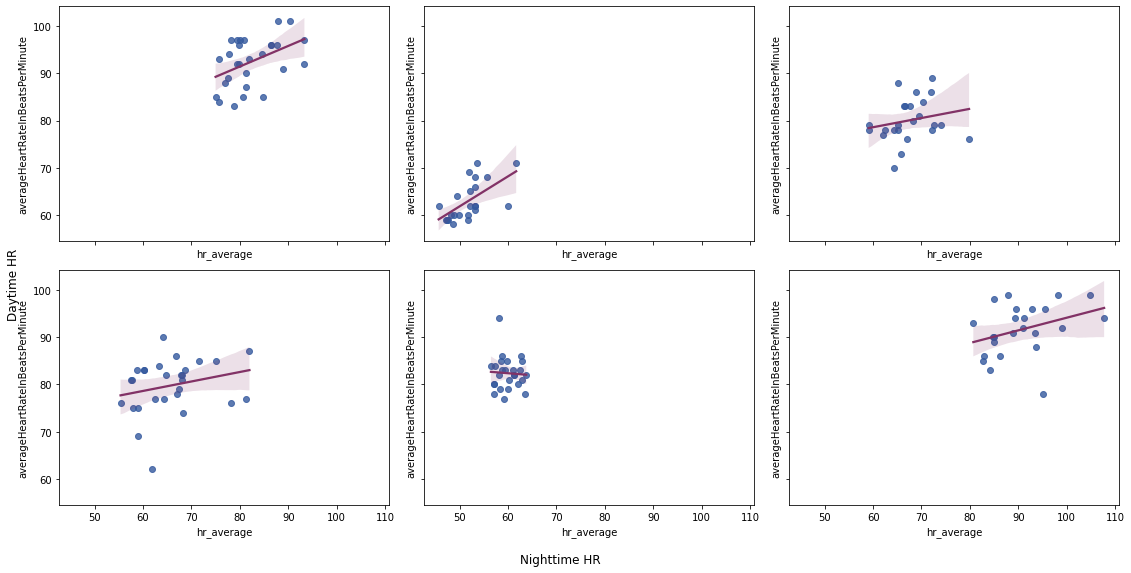

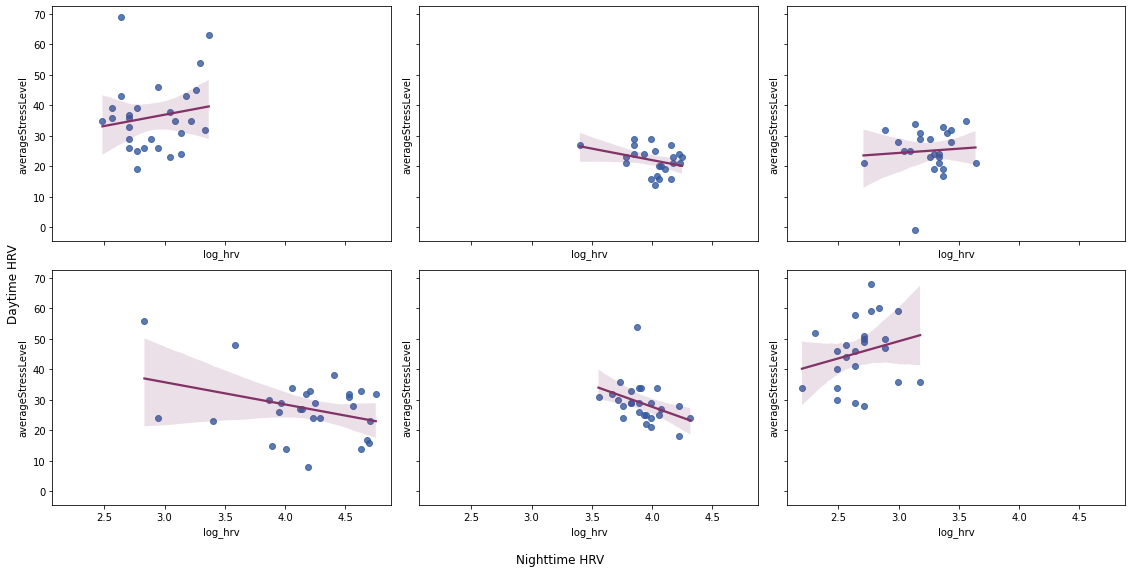

In [25]:
plot_6_daytime_nighttime(garmin_df)

In [26]:
def plot_on_off_stress(df, features, stress_definitions):
    features_recoded = {"hr_average": "Heart Rate", "log_hrv":"Heart Rate Variability", 
                        "breath_average": "Respiratory Rate", "temperature_delta": "Temperature"}
    definitions_recoded = {"daily_stressed": "Daily Stressed", "daily_shifts":"Daily Shifts", 
                        "shift_stress": "Shift Stress", "hrv_binary": "HRV Binary"}
    
    participants=[]
    dfs = []
    
    while len(participants)!=6:
        p = rand_participant(df, 1)
        df1 = fetch_participant_df(df, p)
        df1 = hrv_binarize(df1, 0.75, 0.25)
        #df1 = any_stress(df1)
        df1["daily_shifts"] = df1.apply (lambda row: daily_shifts_binarize(row.daily_shifts), axis=1)
        
        valid = True
        for stress_definition in stress_definitions:
            if len(df1[stress_definition].dropna())<30 or len(df1[stress_definition].dropna().unique())<2 or len(df1[df1[stress_definition]==0][features].dropna())<10 or len(df1[df1[stress_definition]==1][features].dropna())<10:
                valid = False
        if valid == True and p not in participants:
            participants.append(p)
            dfs.append(df1)

    
    for stress_definition in stress_definitions:
        for feature in features:
            fig, ax = plt.subplots(2, 3, figsize=(16,8), sharex=True)


            sns.kdeplot(x=feature, hue=stress_definition, data=dfs[0], ax = ax[0,0], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title("Participant A")
            sns.kdeplot(x=feature, hue=stress_definition, data=dfs[1], ax = ax[0,1], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title("Participant B")
            sns.kdeplot(x=feature, hue=stress_definition, data=dfs[2], ax = ax[0,2], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title("Participant C")
            sns.kdeplot(x=feature, hue=stress_definition, data=dfs[3], ax = ax[1,0], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title("Participant D")
            sns.kdeplot(x=feature, hue=stress_definition, data=dfs[4], ax = ax[1,1], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title("Participant E")
            sns.kdeplot(x=feature, hue=stress_definition, data=dfs[5], ax = ax[1,2], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title("Participant F")

            fig.suptitle(definitions_recoded[stress_definition])
            fig.supxlabel(features_recoded[feature])
            plt.tight_layout()

../src/definitions.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hrv_percentile'] = df["log_hrv"].rank(pct = True)
../src/definitions.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hrv_binary"] = df.apply (lambda row: binarize_reverse(row.hrv_percentile, stress_cutoff, no_stress_cutoff), axis=1)
/h/snagaraj/.conda/envs/stressrecov/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

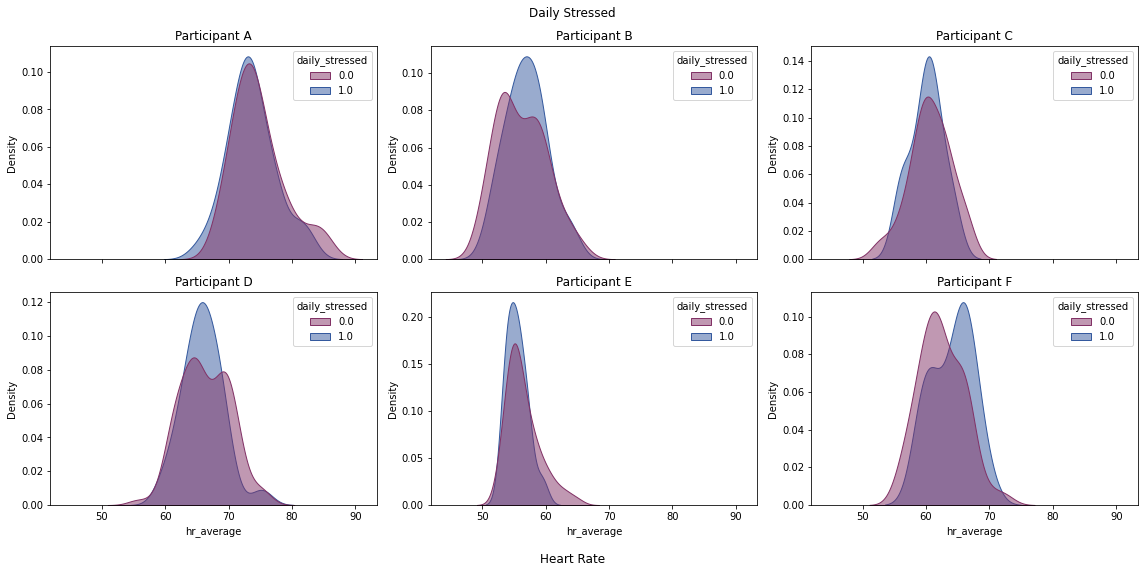

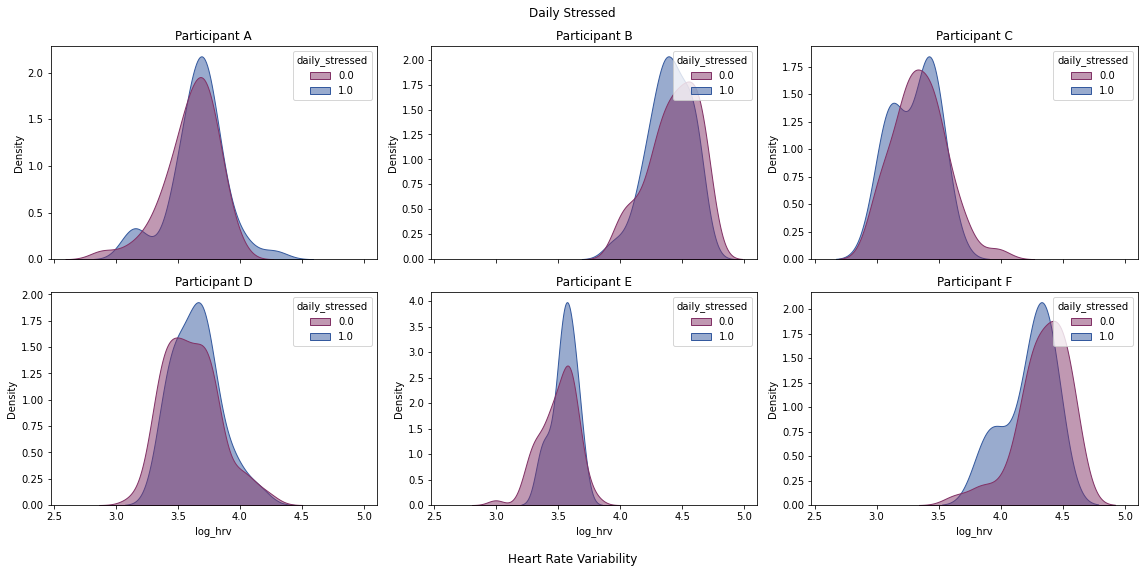

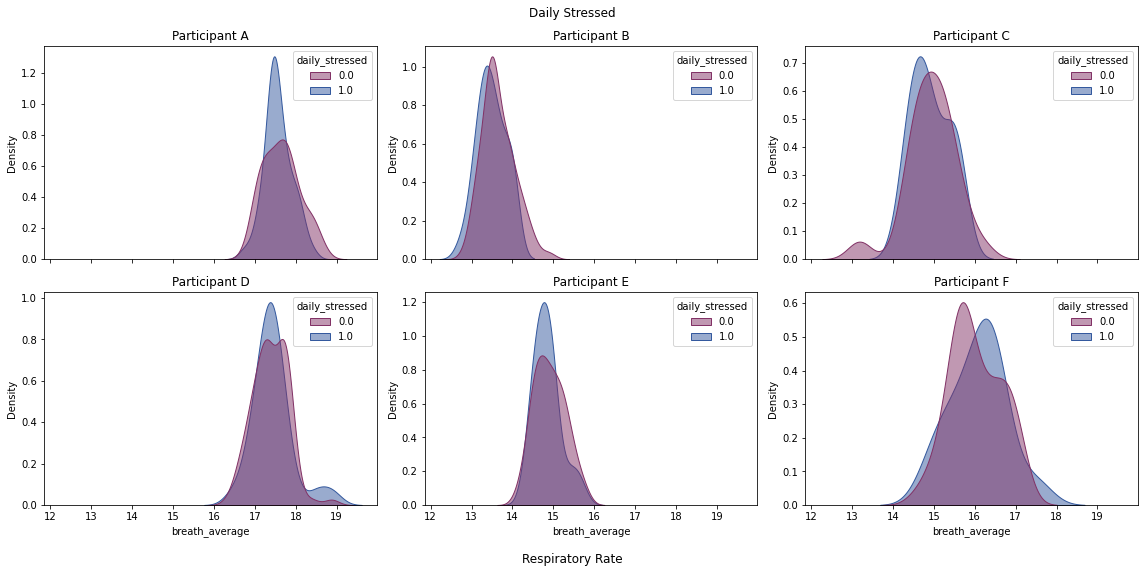

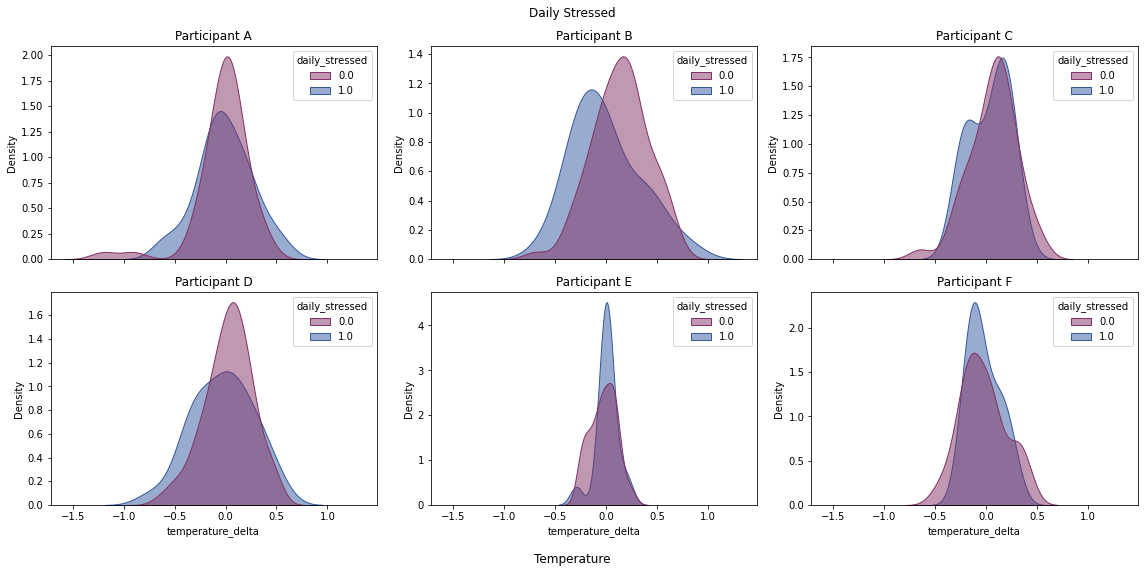

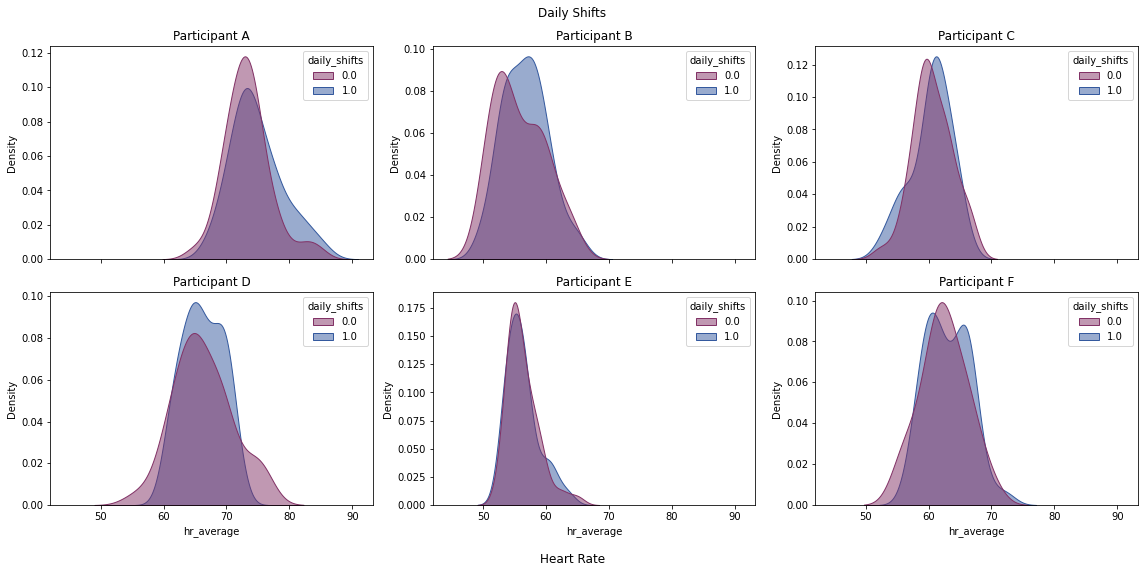

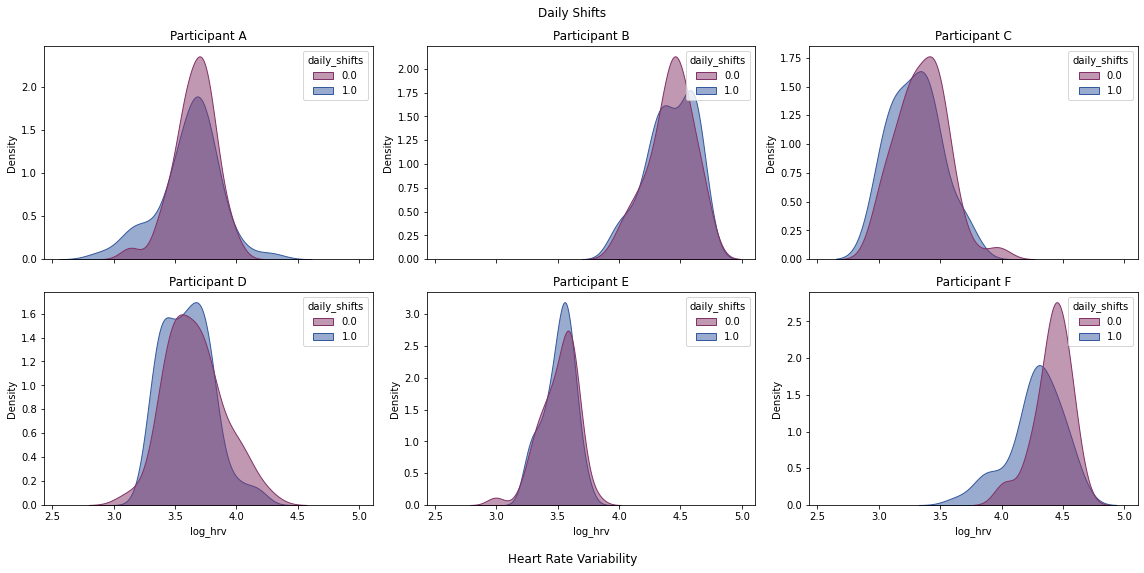

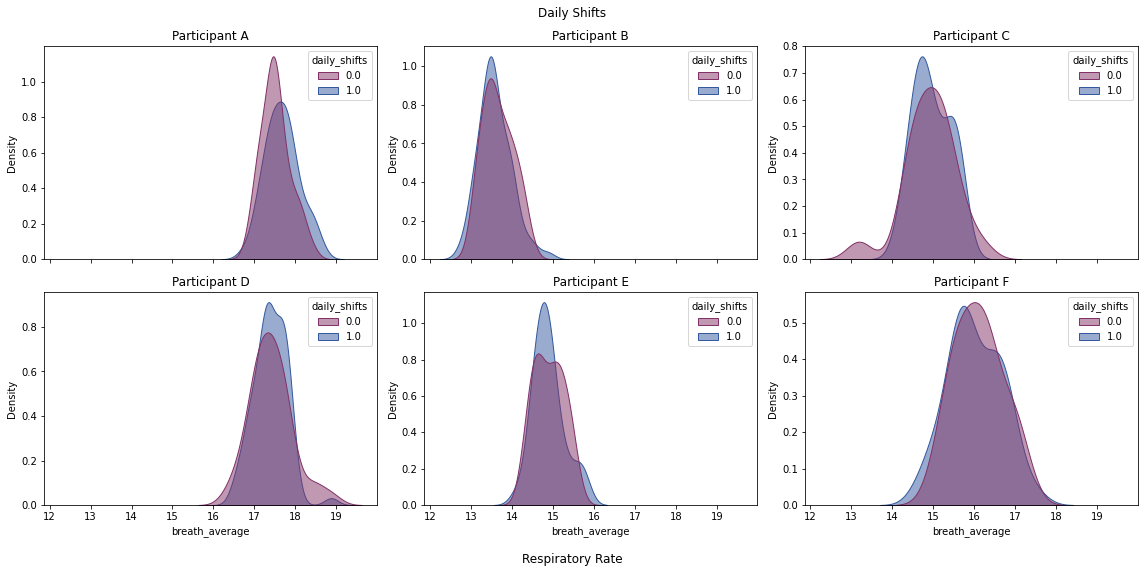

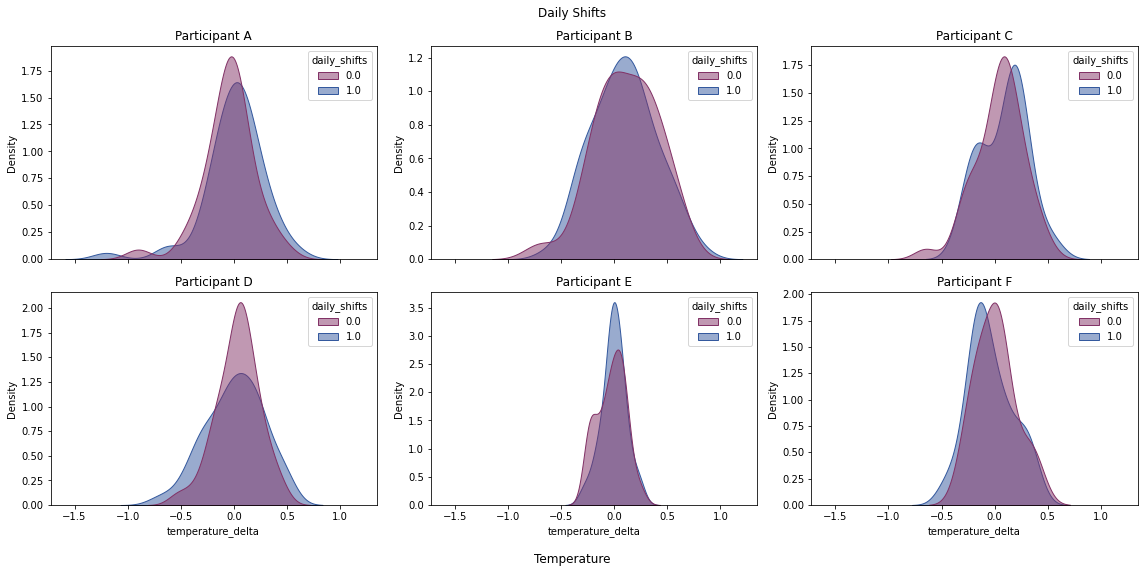

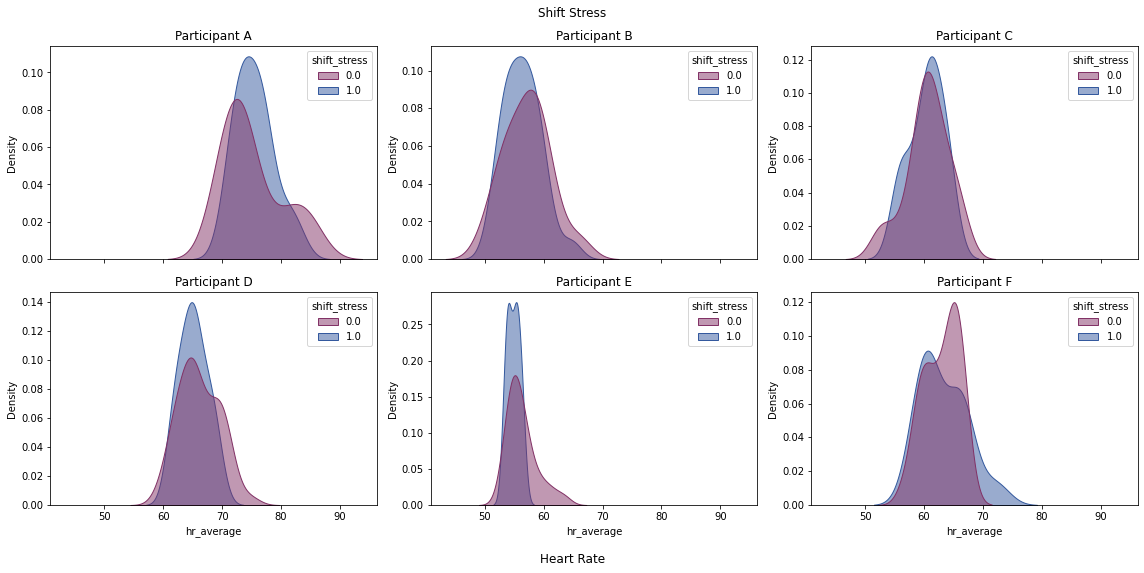

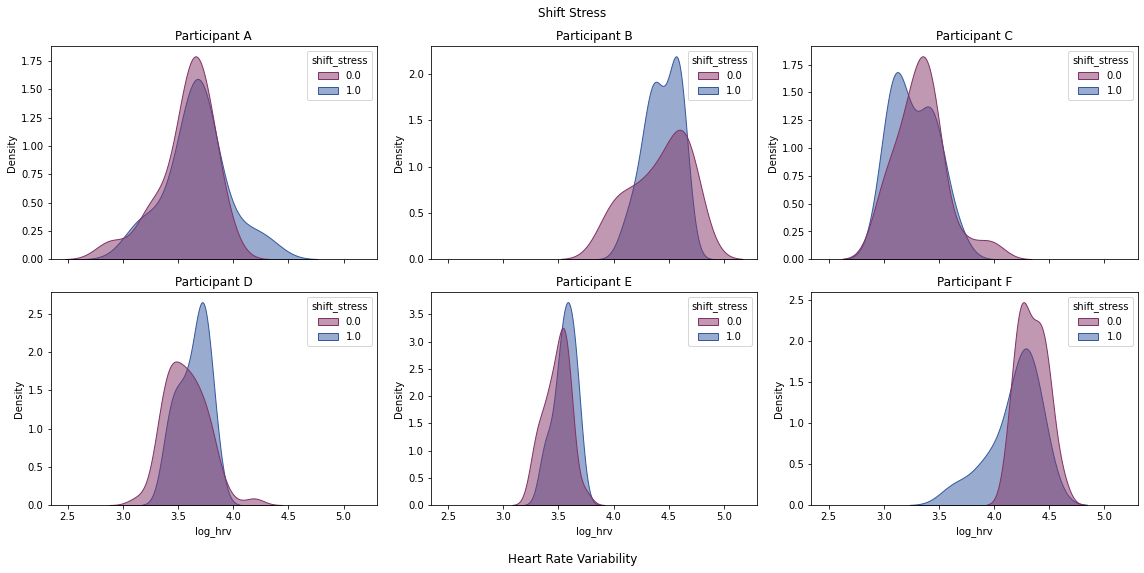

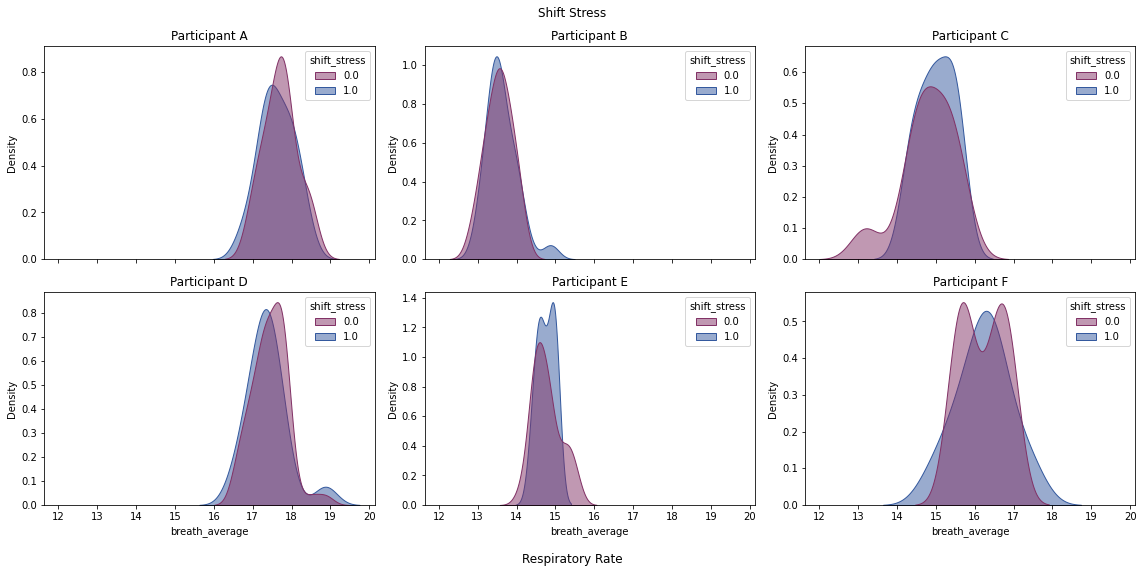

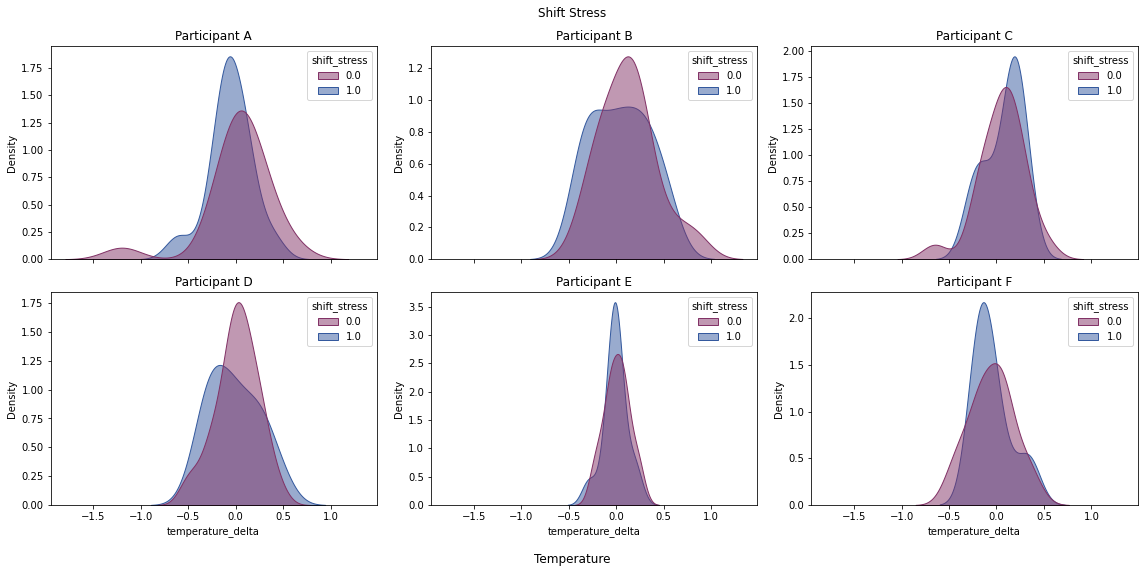

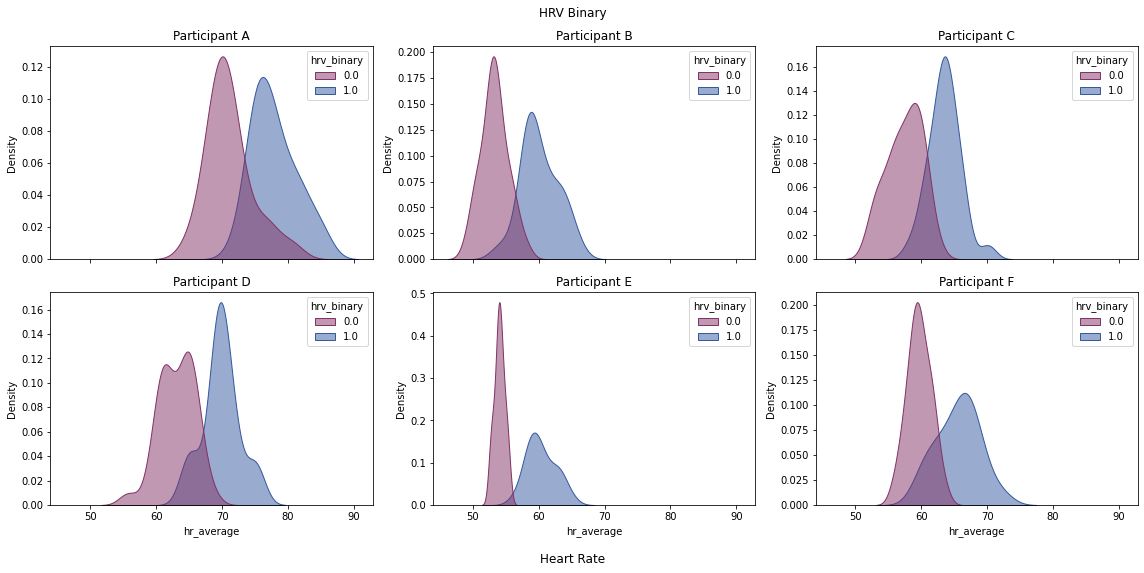

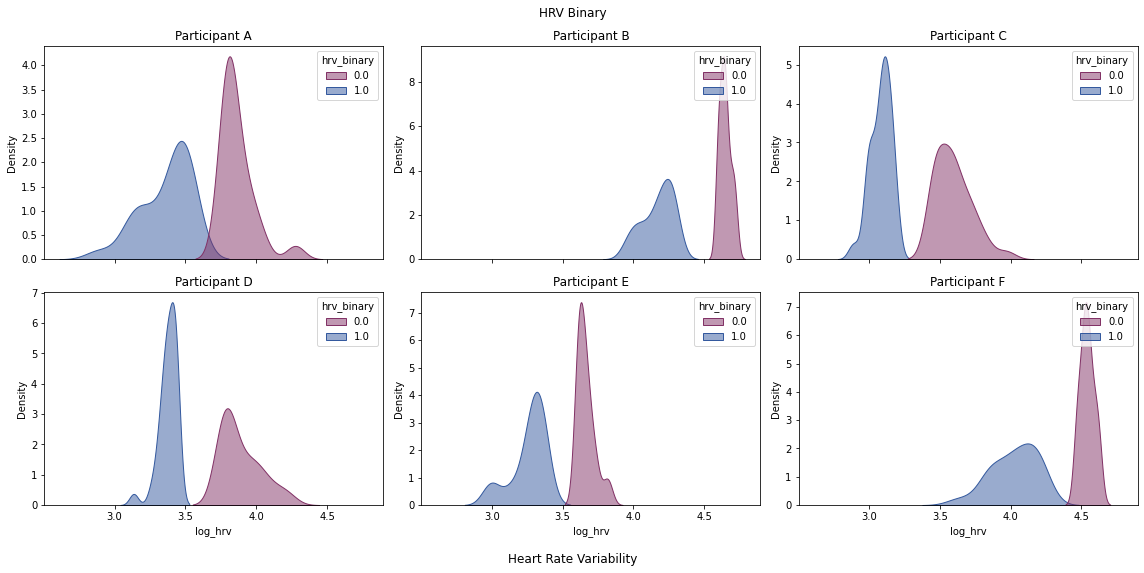

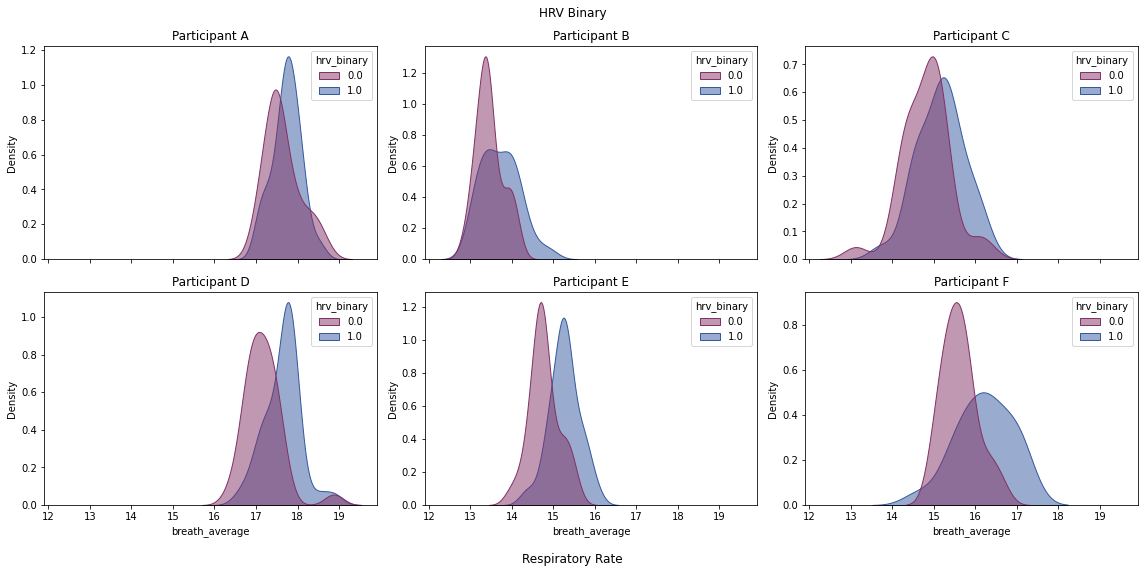

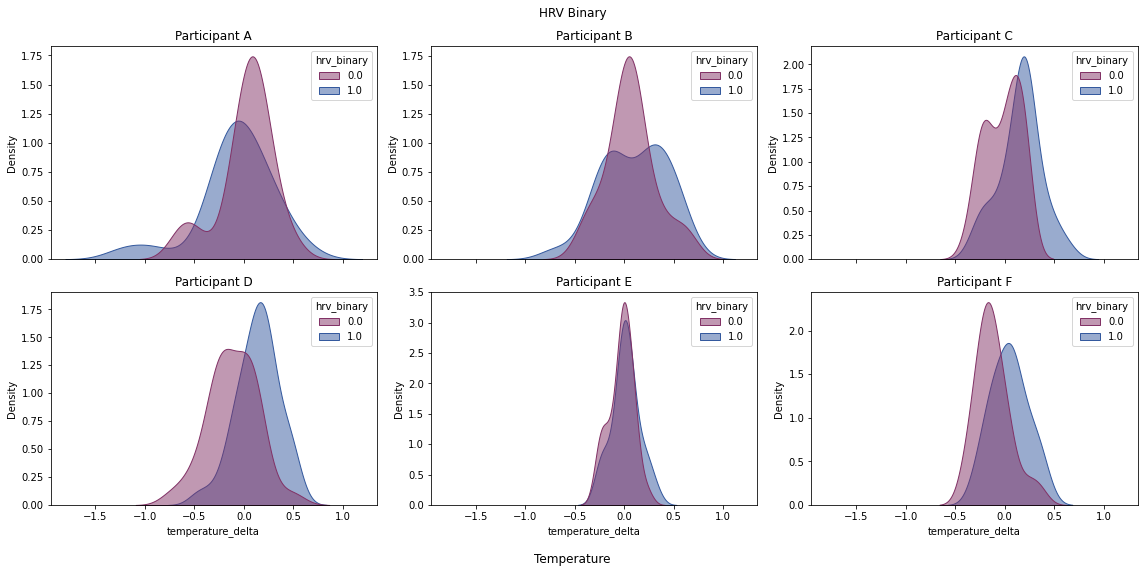

In [27]:
features = ["hr_average", "log_hrv", "breath_average", "temperature_delta"]
stress_definitions = ["daily_stressed", "daily_shifts", "shift_stress", "hrv_binary"]
plot_on_off_stress(merged_df, features, stress_definitions)

# Connectivity

In [29]:
def unpack_stress_reference(model):
    stress = {}
    no_stress = {}

    for key in model:
        stress[key] = []
        no_stress[key] = []
        for (a,b) in model[key]:
            if a == "stress":
                stress[key].append(b)
            else:
                no_stress[key].append(b)
    return stress, no_stress

def weighted_graph_reference(dict_freq, features):
    #nodes = list(set([item for sublist in dict_freq for item in sublist]))
    nodes = features
    colour_lis = colour_list(nodes)

    net = Network('500px', '1000px', notebook=True, directed=False)
    net.add_nodes(nodes, color= colour_lis)
    
    values = [value for key,value in dict_freq.items()]
    #mean = sum(values)/len(values)
    #std = statistics.stdev(values)
    for key,value in dict_freq.items():
        if value != 0:
            net.add_edge(key[0], key[1], weight=value, title=value,width = value)
    net.toggle_physics(True)
    net.repulsion(
        node_distance=50,
        central_gravity=0.15,
        spring_length=200,
        spring_strength=0.1,
        damping=0.09)
    net.show_buttons()
    return net

def dict_freq_themes(dict_freq):
    new_dict = {("phys","phys"):0, ("sleep","sleep"):0, ("mental","mental"):0, ("phys","sleep"):0, ("phys","mental"):0, ("sleep","mental"):0}
    
    for key in dict_freq.keys():
        a,b = key
        if between_phys_connection(a,b):
            new_dict[("phys","phys")] += 1
        elif between_sleep_connection(a,b):
            new_dict[("sleep","sleep")] += 1
        elif between_mental_connection(a,b):
            new_dict[("mental","mental")] += 1
        elif between_phys_sleep_connection(a,b):
            new_dict[("phys","sleep")] += 1
        elif between_phys_mental_connection(a,b):
            new_dict[("phys","mental")] += 1
        elif between_sleep_mental_connection(a,b):
            new_dict[("sleep","mental")] += 1
    return new_dict

def plot_individual_graph_reference(participant_id ,stress_definition, cutoff, which_features = "all", stress_flag=False):
    
    oura = ['breath_average','efficiency','hr_average','hr_lowest','onset_latency','score','temperature_delta','temperature_trend_deviation','total','log_hrv']
    garmin = ['steps','minHeartRateInBeatsPerMinute','maxHeartRateInBeatsPerMinute','averageHeartRateInBeatsPerMinute','restingHeartRateInBeatsPerMinute','averageStressLevel','maxStressLevel','stressDurationInSeconds','restStressDurationInSeconds','activityStressDurationInSeconds','lowStressDurationInSeconds','mediumStressDurationInSeconds','highStressDurationInSeconds']
    surveys = ['daily_stressed','daily_control','daily_shifts','sam8','shift_stress','promis_sd5','EBTBP','phq9_score','gad7_score','promis_sri_score','pss4_score','promis_es_score',"fss_score"]
   
    if stress_definition == "daily_stressed":
        surveys.remove("daily_stressed")
    elif stress_definition == "daily_shifts":
        surveys.remove("daily_shifts")
    elif stress_definition == "shift_stress":
        surveys.remove("shift_stress")

    features = oura+surveys
    
    #Edges On vs Off Stress for different individuals
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    path = os.path.join(parent_dir, "results", "PC",'reference', stress_definition)
    
    filename_a = path+"/oura+surveys_window_"
    filename_b = "_0.75_0.25_bootstraps_100_buffer_3_miss_0_mcv_2_sig_0.05_pearsonr.pkl"

    oura_surveys_reference = filename_a+stress_definition+filename_b   

    with open(oura_surveys_reference, 'rb') as f:
        dict_reference,dict_models, dict_features  = pickle.load(f)
        
    stress, no_stress = unpack_stress_reference(dict_models)
    
    if stress_flag==True:
        models = stress[participant_id]
    else:
        models = no_stress[participant_id]
    

    lis_tuples = []
    for model in models:
        for item in list(model.edges()):
            a,b = item
            if (a,b) in lis_tuples:
                lis_tuples.append(item)
            elif (b,a) in lis_tuples:
                lis_tuples.append((b,a))
            else:
                lis_tuples.append(item)

    

    frequency_list = Counter(lis_tuples)
    sorted_d = dict( sorted(frequency_list.items(), key=operator.itemgetter(1),reverse=True))
    for key in sorted_d.keys():
        sorted_d[key] = sorted_d[key]/100

    dict_freq = remove_duplicates(sorted_d, cutoff)
    if which_features == "themes":
        dict_freq = dict_freq_themes(dict_freq)
    lis_nodes = []
    for (a,b) in dict_freq.keys():
        lis_nodes.append(a)
        lis_nodes.append(b)
        
    set_nodes = list(set(lis_nodes))
    
    if which_features == "all":
        net = weighted_graph_reference(dict_freq, features)
    elif which_features == "themes":
        net = weighted_graph_reference(dict_freq, ["phys", "sleep", "mental"])
    else:
        net = weighted_graph_reference(dict_freq, set_nodes)
    
    return net

# Visualizing Random Individuals Connectivity

In [ ]:
stress_definition = "daily_stressed"
cutoff = 0.25

loaded_df = get_df(stress_definition)

rand_participant = random.choice(loaded_df.participant_id.unique())

In [ ]:
no_stress_graph = plot_individual_graph_reference(rand_participant ,stress_definition, cutoff, which_features = "all", stress_flag=False)
no_stress_graph.show("no_stress.html")

In [ ]:
stress_graph = plot_individual_graph_reference(rand_participant ,stress_definition, cutoff, which_features = "all", stress_flag=True)
stress_graph.show("stress.html")

# Visualizing Stress compared to Reference

In [ ]:
def plot_reference(stress_definitions):
    
    for stress_definition in stress_definitions:
        df = get_df(stress_definition)
    
        participants = []
        dfs = []
        while len(participants)!=6:
            p = random.choice(df.participant_id.unique())
            subset = df[df["participant_id"]==p]
            if len(subset[subset["label"]=="stress"].difference.unique())>1 and p not in participants:
                participants.append(p)
                dfs.append(subset)

        
        fig, ax = plt.subplots(2, 3, sharex=True, figsize=(16,8))


        sns.kdeplot(x="difference", hue="label", data=dfs[0], ax = ax[0,0], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title(dfs[0].participant_id.unique()[0])
        sns.kdeplot(x="difference", hue="label", data=dfs[1], ax = ax[0,1], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title(dfs[1].participant_id.unique()[0])
        sns.kdeplot(x="difference", hue="label", data=dfs[2], ax = ax[0,2], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title(dfs[2].participant_id.unique()[0])
        sns.kdeplot(x="difference", hue="label", data=dfs[3], ax = ax[1,0], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title(dfs[3].participant_id.unique()[0])
        sns.kdeplot(x="difference", hue="label", data=dfs[4], ax = ax[1,1], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title(dfs[4].participant_id.unique()[0])
        sns.kdeplot(x="difference", hue="label", data=dfs[5], ax = ax[1,2], fill=True, common_norm=False, palette=[evi_purple, evi_blue], alpha=.5).set_title(dfs[5].participant_id.unique()[0])

        fig.suptitle(stress_definition)
        plt.tight_layout()
        

In [ ]:
stress_definitions = ["daily_stressed", "daily_shifts", "shift_stress", "hrv_binary"]
plot_reference(stress_definitions)

# Chord Diagrams

In [ ]:
def get_adjacency(graph, stress_definition, directed=False):
    
    oura = ['breath_average','efficiency','hr_average','hr_lowest','onset_latency','score','temperature_delta','temperature_trend_deviation','total','log_hrv']
    surveys = ['daily_stressed','daily_control','daily_shifts','sam8','shift_stress','promis_sd5','EBTBP','phq9_score','gad7_score','promis_sri_score','pss4_score','promis_es_score',"fss_score"]
   
    if stress_definition == "daily_stressed":
        surveys.remove("daily_stressed")
    elif stress_definition == "daily_shifts":
        surveys.remove("daily_shifts")
    elif stress_definition == "shift_stress":
        surveys.remove("shift_stress")

    nodes = oura+surveys
    edges = graph.get_edges()


    A = np.full((len(nodes), len(nodes)), fill_value=0.0)

    # Map nodes to row/col in matrix
    idx = dict(zip(nodes, range(len(nodes))))
    
    i, j, wts = [], [], []

    for item in edges:
        i.append(idx[item["from"]])
        j.append(idx[item["to"]])
        wts.append(item["weight"])

    # Set array values with advanced indexing
    A[i, j] = wts
    if directed == False:
        A[j, i] = wts
    return A, (nodes)

def get_adjacency_themes(graph, stress_definition, directed=False):
    

    nodes = ["phys", "sleep", "mental"]
    edges = graph.get_edges()


    A = np.full((len(nodes), len(nodes)), fill_value=0.0)

    # Map nodes to row/col in matrix
    idx = dict(zip(nodes, range(len(nodes))))
    
    i, j, wts = [], [], []

    for item in edges:
        i.append(idx[item["from"]])
        j.append(idx[item["to"]])
        wts.append(item["weight"])

    # Set array values with advanced indexing
    A[i, j] = wts
    if directed == False:
        A[j, i] = wts
    return A, (nodes)

def plot_pair_chord(no_stress_graph,stress_graph, stress_definition, directed=False):
    
    no_stress_adj,no_stress_nodes = get_adjacency(no_stress_graph, stress_definition = stress_definition, directed=directed)
    stress_adj, stress_nodes = get_adjacency(stress_graph, stress_definition = stress_definition, directed=directed)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 50))

    chord_diagram(no_stress_adj, rename_nodes2(no_stress_nodes), ax=ax1, rotate_names = True, gap=0, min_chord_width=0.5, chord_width=5, pad=10, fontsize=65, width = 0.03, colors=colour_list(no_stress_nodes), fontcolor=colour_list(no_stress_nodes), use_gradient=True)
    chord_diagram(stress_adj, rename_nodes2(stress_nodes), ax=ax2, rotate_names = True, gap=0, min_chord_width=0.5, chord_width=5, pad=10, fontsize=65, width = 0.03, colors=colour_list(stress_nodes), fontcolor=colour_list(stress_nodes), use_gradient=True)

    plt.show()

def plot_pair_chord_themes(no_stress_graph,stress_graph, stress_definition, directed=False):
    
    no_stress_adj,no_stress_nodes = get_adjacency_themes(no_stress_graph, stress_definition = stress_definition, directed=directed)
    stress_adj, stress_nodes = get_adjacency_themes(stress_graph, stress_definition = stress_definition, directed=directed)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 50))

    chord_diagram(no_stress_adj, rename_nodes(no_stress_nodes), ax=ax1, gap=0, min_chord_width=0.0, chord_width=0.5, pad=4, fontsize=60, width = 0.3, colors=colour_list_themes(no_stress_nodes), fontcolor=colour_list_themes(no_stress_nodes), use_gradient=True)
    chord_diagram(stress_adj, rename_nodes(stress_nodes), ax=ax2, gap=0, min_chord_width=0.0, chord_width=0.5, pad=4, fontsize=60, width = 0.3, colors=colour_list_themes(stress_nodes), fontcolor=colour_list_themes(stress_nodes), use_gradient=True)

    plt.show()
    
def plot_difference_chord(no_stress_graph,stress_graph, stress_definition, directed=False):
    
    no_stress_adj,no_stress_nodes = get_adjacency(no_stress_graph, stress_definition = stress_definition, directed=directed)
    stress_adj, stress_nodes = get_adjacency(stress_graph, stress_definition = stress_definition, directed=directed)
    
    difference = no_stress_adj - stress_adj
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))

    chord_diagram(difference, (no_stress_nodes), ax=ax1, min_chord_width=100, chord_width=1, pad=10, fontsize=10, width = 0.01, colors=colour_list(no_stress_nodes), use_gradient=True)
    
    plt.show()
    
        
def plot_difference_bubbles(no_stress_graph,stress_graph, stress_definition, directed=False):
    
    no_stress_adj,no_stress_nodes = get_adjacency(no_stress_graph, stress_definition = stress_definition, directed=directed)
    stress_adj, stress_nodes = get_adjacency(stress_graph, stress_definition = stress_definition, directed=directed)
    
    difference = no_stress_adj - stress_adj
    
    (N,M) = difference.shape
    
    ylabels = no_stress_nodes
    xlabels = no_stress_nodes

    x, y = np.meshgrid(np.arange(M), np.arange(N))
    c = difference
    s = difference
    
    fig, ax = plt.subplots(figsize=(10, 10))

    R = s/s.max()/2
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap="coolwarm")
    ax.add_collection(col)

    ax.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    ax.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax.grid(which='minor')

    fig.colorbar(col)
    plt.show()
    
def plot_difference_heatmap(no_stress_graph,stress_graph, stress_definition, directed=False):
    
    no_stress_adj,no_stress_nodes = get_adjacency(no_stress_graph, stress_definition = stress_definition, directed=directed)
    stress_adj, stress_nodes = get_adjacency(stress_graph, stress_definition = stress_definition, directed=directed)
    
    difference = no_stress_adj - stress_adj
    
    mask = np.zeros_like(difference)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10,10))
        ax = sns.heatmap(difference, mask=mask, square=True,linewidths=2.0, center=0.0,vmax=1.0,vmin=-1.0, cmap=sns.diverging_palette(220, 20, as_cmap=True), xticklabels=no_stress_nodes, yticklabels=no_stress_nodes)
        plt.show()

In [ ]:
#universal participants

daily_stressed_participants = get_participants("daily_stressed")

daily_shifts_participants = get_participants("daily_shifts")
    
shift_stress_participants = get_participants("shift_stress")
        
hrv_binary_participants = get_participants("hrv_binary")

#any_stress_participants = get_participants("any_stress")

universal_participants = [p for p in shift_stress_participants if (p in daily_stressed_participants and p in daily_shifts_participants and p in hrv_binary_participants)]
len(universal_participants)

In [ ]:
#rand_participants = random.sample(universal_participants,2)
rand_participants = ['U-3N1NZWHWN7Y96Z3Z1A9J', 'U-NRJ69PN8F3GUUA2XKPNX']

In [ ]:
cutoff = 0.5
stress_definitions = ["daily_stressed", "daily_shifts", "shift_stress", "hrv_binary"]

for rand_participant in rand_participants:
    print(rand_participant)
    for stress_definition in stress_definitions:
        no_stress_graph = plot_individual_graph_reference(rand_participant ,stress_definition, cutoff, which_features = "all", stress_flag=False)
        stress_graph = plot_individual_graph_reference(rand_participant ,stress_definition, cutoff, which_features = "all", stress_flag=True)

        plot_pair_chord(no_stress_graph,stress_graph, stress_definition, directed=False)
        #plot_difference_heatmap(no_stress_graph,stress_graph, stress_definition, directed=True)

In [ ]:
cutoff = 0.5
stress_definitions = ["daily_stressed", "daily_shifts", "shift_stress", "hrv_binary"]

for rand_participant in rand_participants:
    print(rand_participant)
    for stress_definition in stress_definitions:
        no_stress_graph = plot_individual_graph_reference(rand_participant ,stress_definition, cutoff, which_features = "themes", stress_flag=False)
        stress_graph = plot_individual_graph_reference(rand_participant ,stress_definition, cutoff, which_features = "themes", stress_flag=True)

        plot_pair_chord_themes(no_stress_graph,stress_graph, stress_definition, directed=False)
        #plot_difference_heatmap(no_stress_graph,stress_graph, stress_definition, directed=True)

In [ ]:
rand_participant = random.sample(universal_participants,1)[0]
stress_definition = "daily_stressed"

no_stress_graph_themes = plot_individual_graph_reference(rand_participant ,stress_definition, cutoff, which_features = "themes", stress_flag=False)
no_stress_graph = plot_individual_graph_reference(rand_participant ,stress_definition, cutoff, which_features = "all", stress_flag=False)
    
no_stress_graph_themes.show("graph.html")

In [ ]:
no_stress_graph.show("graph1.html")

# Visualizing Changing Edges

In [ ]:
def adj_helper(dict_edge_weights, nodes, directed=False):
    A = np.full((len(nodes), len(nodes)), fill_value=0.0)

    # Map nodes to row/col in matrix
    idx = dict(zip(nodes, range(len(nodes))))
    
    i, j, wts = [], [], []

    for key in dict_edge_weights:
        i.append(idx[key[0]])
        j.append(idx[key[1]])
        wts.append(dict_edge_weights[key])

    # Set array values with advanced indexing
    A[i, j] = wts
    if directed == False:
        A[j, i] = wts
    return A

def return_edge_adjacency(df, stress_definition, percent_cutoff, n_cutoff):
    
    edges_added = {}
    for edge in df.edge.unique():
        edge_df = df[df["edge"]==edge]
        sub_df = edge_df[edge_df["percent_added"]>=percent_cutoff]
        if len(sub_df)>=n_cutoff:
            if edge not in edges_added:
                edges_added[edge] = len(sub_df)

    edges_removed =  {}
    for edge in df.edge.unique():
        edge_df = df[df["edge"]==edge]
        sub_df = edge_df[edge_df["percent_removed"]>=percent_cutoff]
        if len(sub_df)>=n_cutoff:
            if edge not in edges_removed:
                edges_removed[edge] = len(sub_df)
            
            
    oura = ['breath_average','efficiency','hr_average','hr_lowest','onset_latency','score','temperature_delta','temperature_trend_deviation','total','log_hrv']
    #garmin = ['steps','minHeartRateInBeatsPerMinute','maxHeartRateInBeatsPerMinute','averageHeartRateInBeatsPerMinute','restingHeartRateInBeatsPerMinute','averageStressLevel','maxStressLevel','stressDurationInSeconds','restStressDurationInSeconds','activityStressDurationInSeconds','lowStressDurationInSeconds','mediumStressDurationInSeconds','highStressDurationInSeconds']
    surveys = ['daily_stressed','daily_control','daily_shifts','sam8','shift_stress','promis_sd5','EBTBP','phq9_score','gad7_score','promis_sri_score','pss4_score','promis_es_score',"fss_score"]
   
    if stress_definition == "daily_stressed":
        surveys.remove("daily_stressed")
    elif stress_definition == "daily_shifts":
        surveys.remove("daily_shifts")
    elif stress_definition == "shift_stress":
        surveys.remove("shift_stress")

    nodes = oura+surveys
    
    added_adj = adj_helper(edges_added, nodes, directed=False)
    removed_adj = adj_helper(edges_removed, nodes, directed=False)

    return added_adj,removed_adj, nodes

def plot_added_removed_chord(added, removed, nodes):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 50))

    chord_diagram(added, rename_nodes2(nodes), ax=ax1, min_chord_width=200,rotate_names = True, chord_colors = evi_green, gap=0, chord_width=5, pad=10, fontsize=60, width = 0.03, colors=colour_list(nodes), fontcolor=colour_list(nodes))
    chord_diagram(removed, rename_nodes2(nodes), ax=ax2, min_chord_width=200,rotate_names = True, chord_colors = evi_orange, gap=0,chord_width=5, pad=10, fontsize=60, width = 0.03, colors=colour_list(nodes), fontcolor=colour_list(nodes))

    plt.show()

In [ ]:
for stress_definition in stress_definitions:

    df_edges = return_edge_summary(stress_definition)

    added, removed, nodes = return_edge_adjacency(df_edges, stress_definition, 0.75, 0.05*len(get_participants(stress_definition)))

    plot_added_removed_chord(added, removed, nodes)

# Differences in Edge Structure 

In [ ]:
#Edges On vs Off Stress for different individuals
for stress_definition in stress_definitions:

    between_edges = []
    within_edges = []
    stress_label = []

    parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    path = os.path.join(parent_dir, "results", "PC",'reference', stress_definition)

    filename_a =path+"/oura+surveys_window_"
    filename_b = "_0.75_0.25_bootstraps_100_buffer_3_miss_0_mcv_2_sig_0.05_pearsonr.pkl"

    oura_surveys_reference = filename_a+stress_definition+filename_b   

    with open(oura_surveys_reference, 'rb') as f:
        dict_reference,dict_models, dict_features  = pickle.load(f)

    stress, no_stress = unpack_stress_reference(dict_models)

    for key in tqdm(stress.keys()):
        for graph in stress[key]:
            edges = graph.edges()
            total_edges = len(edges)
            if total_edges != 0:
                between_count = 0
                for (a,b) in edges:
                    if between_modality_connection(a,b):
                        between_count +=1

                within_count = total_edges - between_count

                between_edges.append(between_count/total_edges)
                within_edges.append(within_count/total_edges)
                stress_label.append("stress")

    for key in tqdm(no_stress.keys()):
        for graph in no_stress[key]:
            edges = graph.edges()
            total_edges = len(edges)

            if total_edges != 0:

                between_count = 0
                for (a,b) in edges:
                    if between_modality_connection(a,b):
                        between_count +=1

                within_count = total_edges - between_count

                between_edges.append(between_count/total_edges)
                within_edges.append(within_count/total_edges)
                stress_label.append("no_stress")

    edge_structure = {"between_edges":between_edges, "within_edges":within_edges, "label":stress_label}

    edge_structure = pd.DataFrame.from_dict(edge_structure)
    print(stress_definition)
    print(edge_structure.groupby('label')['between_edges', "within_edges"].describe())